<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Exploring-Data" data-toc-modified-id="Exploring-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring Data</a></span><ul class="toc-item"><li><span><a href="#Meet-and-Greet-Data" data-toc-modified-id="Meet-and-Greet-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Meet and Greet Data</a></span></li><li><span><a href="#Split-Train-set-and-Test-set" data-toc-modified-id="Split-Train-set-and-Test-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Split Train set and Test set</a></span></li><li><span><a href="#Exploring-Labels" data-toc-modified-id="Exploring-Labels-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploring Labels</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Normalize" data-toc-modified-id="Normalize-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Normalize</a></span></li><li><span><a href="#Tokeninzing" data-toc-modified-id="Tokeninzing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tokeninzing</a></span></li><li><span><a href="#Add-Words-Position" data-toc-modified-id="Add-Words-Position-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Add Words Position</a></span></li><li><span><a href="#Delete-Small-Tokens" data-toc-modified-id="Delete-Small-Tokens-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Delete Small Tokens</a></span></li><li><span><a href="#Length-of-Hemistichs" data-toc-modified-id="Length-of-Hemistichs-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Length of Hemistichs</a></span></li><li><span><a href="#Lemmatizing" data-toc-modified-id="Lemmatizing-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Lemmatizing</a></span></li><li><span><a href="#Stemming" data-toc-modified-id="Stemming-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Stemming</a></span></li><li><span><a href="#Existance-Matrix" data-toc-modified-id="Existance-Matrix-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Existance Matrix</a></span></li></ul></li><li><span><a href="#Creating-Pipeline" data-toc-modified-id="Creating-Pipeline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creating Pipeline</a></span></li><li><span><a href="#Train-Naive-Bayes-Model-And-How-It-Works" data-toc-modified-id="Train-Naive-Bayes-Model-And-How-It-Works-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train Naive Bayes Model And How It Works</a></span><ul class="toc-item"><li><span><a href="#Scores-for-Hafez" data-toc-modified-id="Scores-for-Hafez-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Scores for <code>Hafez</code></a></span></li><li><span><a href="#Scores-for-Saadi" data-toc-modified-id="Scores-for-Saadi-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Scores for <code>Saadi</code></a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Accuracy</a></span></li></ul></li><li><span><a href="#Evalute-Model" data-toc-modified-id="Evalute-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Evalute Model</a></span></li></ul></div>

# A naive Bayes classifier application: poet detection from poetry (Hafez and Saadi)

**Emad Jabbar**


## Introduction
In this project, we are going to classify poems by two poets of Iran (Hafez and Saadi). We use the Naive Bayes model to classify them and also use two methodologies to make features from poems.


## Exploring Data

###  Meet and Greet Data
At first we read data from our csv files. Then try see their data.

In [1]:
import numpy as np
import pandas as pd
import os
DATA_FOLDER = './Data'
TRAIN_SET = 'train_test.csv'
EVALUATE = 'evaluate.csv'
train_set = pd.read_csv(os.path.join(DATA_FOLDER, TRAIN_SET))
evaluate_set = pd.read_csv(os.path.join(DATA_FOLDER, EVALUATE), index_col='id')

In [2]:
train_set.head()

text  label
0  چون می‌رود این کشتی سرگشته که آخر  hafez
1              که همین بود حد امکانش  saadi
2         ارادتی بنما تا سعادتی ببری  hafez
3         خدا را زین معما پرده بردار  hafez
4        گویی که در برابر چشمم مصوری  saadi

In [3]:
evaluate_set.head()

text
id                                      
1       ور بی تو بامداد کنم روز محشر است
2        ساقی بیار جامی کز زهد توبه کردم
3          مرا هرآینه خاموش بودن اولی‌تر
4   تو ندانی که چرا در تو کسی خیره بماند
5         کاینان به دل ربودن مردم معینند

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20889 entries, 0 to 20888
Data columns (total 2 columns):
text     20889 non-null object
label    20889 non-null object
dtypes: object(2)
memory usage: 326.5+ KB


As you see all columns are not null. So we don't need to impute these columns and we can use their data without any impution.

### Split Train set and Test set
For this goal first of all we shuffle our data and split data into two part of train and test with split factor of 0.2.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_set[['text']], train_set['label'], test_size=0.2, random_state=42)

### Exploring Labels

Lets see how much of our train data is hafez poetry and how much is saadi poetry. 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

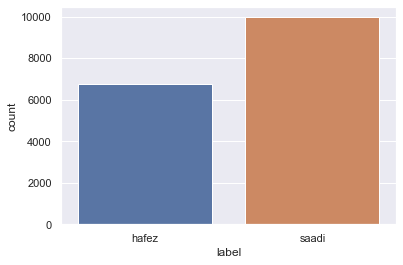

In [7]:
sns.countplot(x=y_train)

There is more peotries by saadi in our train_data.

## Feature Engineering

### Normalize 
At first we nomalize our hemistichs with `hazm` library. this library change one words with extra spaces into one words with half-spaces in persian.

In [8]:
from hazm import Normalizer
normalizer = Normalizer()
normalizer.normalize('اصلاح نويسه ها و استفاده از نیم‌فاصله پردازش را آسان مي كند')

'اصلاح نویسه\u200cها و استفاده از نیم\u200cفاصله پردازش را آسان می\u200cکند'

In [9]:
from sklearn.base import TransformerMixin, BaseEstimator
class PeotNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.normalizer = Normalizer()
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['text'] = X_copy['text'].apply(self.normalizer.normalize)
        return X_copy

In [10]:
X_normalized = PeotNormalizer().fit_transform(X_train)

### Tokeninzing

We tokenize our hemistichs into words using word tokenizer in hazm library. 

In [11]:
from hazm import word_tokenize
class PeotTokenizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['text'] = X_copy['text'].apply(word_tokenize)
        return X_copy

In [12]:
X_tokenized = PeotTokenizer().fit_transform(X_normalized)
X_tokenized.head()

text
19075  [از, چشم, شوخش, ای, دل, ایمان, خود, نگه, دار]
12549    [ز, اخترم, نظری, سعد, در, ره, است, که, دوش]
401            [هر, کس, حکایتی, به, تصور, چرا, کنند]
8542          [مگر, که, لاله, بدانست, بی‌وفایی, دهر]
19664      [گوهر, جام, جم, از, کان, جهانی, دگر, است]

### Add Words Position

We can also position of words here.

In [13]:
class PoetPosAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.max_nums = np.unique(X['text'].apply(len))
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        for i in self.max_nums:
            X_copy[str(i)] = X_copy.apply(lambda row : row['text'][i-1] if len(row['text']) >= i else 0 , axis=1)
        return X_copy

In [14]:
X_positioned = PoetPosAdder().fit_transform(X_tokenized)
X_positioned.head()

text     1      2       3  \
19075  [از, چشم, شوخش, ای, دل, ایمان, خود, نگه, دار]    از    چشم    شوخش   
12549    [ز, اخترم, نظری, سعد, در, ره, است, که, دوش]     ز  اخترم    نظری   
401            [هر, کس, حکایتی, به, تصور, چرا, کنند]    هر     کس  حکایتی   
8542          [مگر, که, لاله, بدانست, بی‌وفایی, دهر]   مگر     که    لاله   
19664      [گوهر, جام, جم, از, کان, جهانی, دگر, است]  گوهر    جام      جم   

            4         5      6     7    8    9 10 11 12 13  
19075      ای        دل  ایمان   خود  نگه  دار  0  0  0  0  
12549     سعد        در     ره   است   که  دوش  0  0  0  0  
401        به      تصور    چرا  کنند    0    0  0  0  0  0  
8542   بدانست  بی‌وفایی    دهر     0    0    0  0  0  0  0  
19664      از       کان  جهانی   دگر  است    0  0  0  0  0

### Delete Small Tokens (Stop words)

We can also delete small words. 

In [15]:
class PoetSmallTokensDeleter(BaseEstimator, TransformerMixin):
    def __init__(self, max_length=2):
        self.max_length = max_length
    def fit(self, X, y=None):
        return self
    def eliminate(self, tokens):
        new = []
        for t in tokens:
            if len(t) > self.max_length:
                new.append(t)
        return new
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['text'] = X_copy['text'].apply(self.eliminate)
        return X_copy

In [16]:
X_smalled = PoetSmallTokensDeleter().fit_transform(X_tokenized)
X_smalled.head()

text
19075   [چشم, شوخش, ایمان, خود, نگه, دار]
12549        [اخترم, نظری, سعد, است, دوش]
401             [حکایتی, تصور, چرا, کنند]
8542   [مگر, لاله, بدانست, بی‌وفایی, دهر]
19664   [گوهر, جام, کان, جهانی, دگر, است]

### Length of Hemistichs

We can add length of hemishtichs which is number of words in a hemishtich.

In [17]:
class PeotLengthAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['length'] = X_copy['text'].apply(len)
        return X_copy

In [18]:
X_with_length = PeotLengthAdder().fit_transform(X_tokenized)
X_with_length.head(1)

text  length
19075  [از, چشم, شوخش, ای, دل, ایمان, خود, نگه, دار]       9

### Lemmatizing
With Lemmatizing we change diffrent form of verbs into a unique form to our model doesnt have some ambiguous choosing rules.

In [19]:
from hazm import Lemmatizer
class PeotLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = Lemmatizer()
    def fit(self, X, y=None):
        return self
    def lemmatizing(self, l):
        return [self.lemmatizer.lemmatize(i) for i in l]
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['text'] = X_copy['text'].apply(self.lemmatizing)
        return X_copy

In [20]:
X_lemmatized = PeotLemmatizer().fit_transform(X_with_length)
X_lemmatized.head(1)

text  length
19075  [از, چشم, شوخ, ای, دل, ایمان, خود, نگه, دار]       9

### Stemming

In [21]:
from PersianStemmer import PersianStemmer
class PeotStemmer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stemmer = PersianStemmer()
    def fit(self, X, y=None):
        return self
    def stemming(self, l):
        return [self.stemmer.run(i) for i in l]
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['text'] = X_copy['text'].apply(self.stemming)
        return X_copy

In [22]:
X_stemmed = PeotStemmer().fit_transform(X_lemmatized)
X_stemmed.head(1)

text  length
19075  [از, چشم, شوخ, ای, دل, ایمان, خود, نگه, دار]       9

### Existance Matrix

This class creates existance matrix. This matrix made by sentence tokens. At first we tokenize every word and then 

In [23]:
class CreateExistenceMatrix(BaseEstimator, TransformerMixin):
    def __init__(self, msg_attr='text', len_index=1):
        self.word_set = set({})
        self.msg_attr = msg_attr
        self.len_index = len_index
    def fit(self, X, y=None):
        for m in X[self.msg_attr]: 
            for w in m:
                self.word_set.add(w)
        return self
    def transform(self, X, y=None):
        dataset = X.copy()
        for word in self.word_set:
            dataset[word] = 0
        indices = dataset.columns[self.len_index:]
        for index, row in dataset.iterrows():
            tokens = row[self.msg_attr]
            for word in tokens:
                if word in dataset.columns:
                    dataset.at[index, word] = dataset.at[index, word] + 1
        dataset.drop(['text'], axis=1, inplace=True)
        return dataset
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X, y)

Lets clean our RAM!

In [24]:
import gc
del X_normalized
del X_tokenized
del X_lemmatized
del X_with_length
gc.collect()

7

## Creating Pipeline
With creating pipeline we collect all of feature eng models into one single pipeline and we can run them on train_set and test_set.

In [25]:
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
#     ('normalize', PeotNormalizer()),
    ('tokenize', PeotTokenizer()),
#     ('pos', PoetPosAdder()),
#     ('smalize', PoetSmallTokensDeleter()),
    ('length_adder', PeotLengthAdder()),
#     ('lemmitize', PeotLemmatizer()),
#     ('stem', PeotStemmer()),
    ('create_matrix', CreateExistenceMatrix()),
])

In [26]:
X_train_pipeline = full_pipeline.fit_transform(X_train)

In [27]:
X_test_pipeline = full_pipeline.transform(X_test)

## Train Naive Bayes Model And How It Works
We use Navie Bayes for this model which follow below rule of thumb.
$$
P(c|X) = \frac{P(c)\times\prod_{i=1}^{f} P(x_i|c)}{P(X)}
$$


First we compute $P(x_i|c)$ for every word. We train this model in this order :
1. First we find number of hafez words and saadi words. With that we will find proiority of being hafez or saadi. 
2. Then we find probabilty of existance of every words in features set. we compute this priority by computing $\frac{\text{Number of Feature Word in Hafez Hemistichs}}{\text{Number of All Words in Hafez Hemistichs}}$ (same for Saadi). Acutally it is $P(c=\text{Hafez} | \text{Saadi})$
3. Next we find probability of other features like length of hemistich. For that we find $P(x=Feature|c)$ by computing $\frac{\text{Number of That Feature in Hafez Hemistichs}}{\text{Number of Hafez Hemistichs}}$ (same for Saadi). Acutally it is $P(x_i|c=\text{Hafez} | \text{Saadi})$
4. For prediction we compute probabilty of every class by multipling all probabilties of every word in hemistichs. 
5. We ignore $P(x)$ because it is same for all of probablities. Actualy it is $\frac{\text{Number of Word}}{\text{Number of All Words In All Hemsitisch}}$ in this problem.
6. **Laplase** : For laplase we should multiply an `alpha` in numerator and $alpha \times \text{Number of All Words Of Hafez/Saadi}$ in denominator. This laplase change value of zero probabilites into a infinitesimal value. We can say 
$$
P(x_i|c=\text{Hafez} | \text{Saadi}) = \frac{\text{Number of That Feature in Hafez Hemistichs} + \alpha}{\text{Number of Hafez words} + \text{Number of Unique Words} \times  \alpha }
$$

In [28]:
class NavieBayes(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=0.5):
        self.alpha = alpha 
    
    def fit(self, X, y=None):
        self.hafez_probs = {}
        self.saadi_probs = {}
        self.non_word_features_saadi_probs = {}
        self.non_word_features_hafez_probs = {}
        
        X_saadi = X[y == 'saadi']
        X_hafez = X[y == 'hafez']
        
        non_words_columns_count = 1
        word_columns = list(X.columns)[non_words_columns_count:]
        self.non_word_columns = list(X.columns)[:non_words_columns_count]
        
        number_of_hafez_words = sum(X_hafez[word_columns].sum())
        number_of_saadi_words = sum(X_saadi[word_columns].sum())
        number_of_unqiue_word_h = sum(X_hafez[word_columns].sum())
        number_of_unqiue_word_s = sum(X_saadi[word_columns].sum())
        
        self.hafez_prior = number_of_hafez_words / (number_of_hafez_words + number_of_saadi_words)
        self.saadi_prior = number_of_saadi_words / (number_of_hafez_words + number_of_saadi_words)
        
        hafez_sums = X_hafez[word_columns].sum()
        saadi_sums = X_saadi[word_columns].sum()
        for c in word_columns:
            self.hafez_probs[c] = ((hafez_sums[c]+self.alpha) / (number_of_hafez_words + number_of_unqiue_word_h*self.alpha))
            self.saadi_probs[c] = ((saadi_sums[c]+self.alpha) / (number_of_saadi_words + number_of_unqiue_word_s*self.alpha))
        
        for c in self.non_word_columns:
            num_of_hafezs_hemistichs = len(X_hafez[X_hafez[c] != 0])
            num_of_saadis_hemistichs = len(X_saadi[X_saadi[c] != 0])
            for i in X_train_pipeline[c].unique():
                self.non_word_features_hafez_probs[(c,i)] = (X_hafez[c] == i).sum() / num_of_hafezs_hemistichs
                self.non_word_features_saadi_probs[(c,i)] = (X_saadi[c] == i).sum() / num_of_saadis_hemistichs
        
        return self
    
    def predict(self, X):
        pred = []
        cols = X.columns
        for index, row in X.iterrows():
            h_prob = self.hafez_prior * 1
            s_prob = self.saadi_prior * 1
            r = row[row != 0]
            for index, value in r.items():
                if index in self.non_word_columns:
                    if not (index, r[index]) in self.non_word_features_hafez_probs : continue
                    h_prob *= self.non_word_features_hafez_probs[(index, r[index])]
                    s_prob *= self.non_word_features_saadi_probs[(index, r[index])]
                else:
                    h_prob *= self.hafez_probs[index]
                    s_prob *= self.saadi_probs[index]

            if h_prob >= s_prob: pred.append('hafez')
            else: pred.append('saadi')
        return np.array(pred)

In [29]:
naive_bayes_with_laplase = NavieBayes(alpha=0.5).fit(X_train_pipeline, y_train)
navie_bayes_without_laplase = NavieBayes(alpha=0).fit(X_train_pipeline, y_train)

In [30]:
pred_laplase = naive_bayes_with_laplase.predict(X_test_pipeline)
pred_without_laplase = navie_bayes_without_laplase.predict(X_test_pipeline)

In [31]:
def recall_score(y_true, y_pred, pos_label="hafez"):
    correct_detected = len(y_pred[(y_pred == pos_label) & (y_true == pos_label)])
    all_pos = len(y_true[y_true == pos_label])
    return correct_detected/all_pos

def precision_score(y_true, y_pred, pos_label="hafez"):
    correct_detected = len(y_pred[(y_pred == pos_label) & (y_true == pos_label)])
    all_detected_pos = len(y_pred[y_pred == pos_label])
    return correct_detected/all_detected_pos

def accuracy_score(y_true, y_pred):
    correct_detected = len(y_pred[(y_pred == y_true)])
    total = len(y_pred)
    return correct_detected/total


### Scores for `Hafez`

In [32]:
print(f'recall for hafez without laplase : {recall_score(y_test.values, pred_without_laplase, pos_label="hafez")}\nrecall for hafez with laplase : {recall_score(y_test.values, pred_laplase, pos_label="hafez")}') 

recall for hafez without laplase : 0.7073897497020262
recall for hafez with laplase : 0.7306317044100119


In [33]:
print(f'precision for hafez without laplase : {precision_score(y_test.values, pred_without_laplase, pos_label="hafez")}\nprecision for hafez with laplase : {precision_score(y_test.values, pred_laplase, pos_label="hafez")}') 

precision for hafez without laplase : 0.7090800477897252
precision for hafez with laplase : 0.7521472392638037


### Scores for `Saadi`

In [34]:
recall_score(y_test.values, pred_laplase, pos_label="saadi")

0.8384

In [35]:
precision_score(y_test.values, pred_laplase, pos_label="saadi")

0.8226059654631083

### Accuracy

In [36]:
print(f'accuracy for hafez without laplase : {accuracy_score(y_test.values, pred_without_laplase)}\naccuracy for hafez with laplase : {accuracy_score(y_test.values, pred_laplase)}') 

accuracy for hafez without laplase : 0.7659167065581618
accuracy for hafez with laplase : 0.7951172809956917


## Evalute Model

In [37]:
X_eval = full_pipeline.fit_transform(train_set[['text']])
y_eval = train_set['label']
X_eval_test = full_pipeline.transform(evaluate_set)

In [38]:
evalute_navie_model = NavieBayes(alpha=0.5).fit(X_eval, y_eval)

In [39]:
y_pred = evalute_navie_model.predict(X_eval_test)

In [40]:
output = pd.DataFrame(data={'id':X_eval_test.index.values, 'label':y_pred})

In [41]:
output.to_csv('output.csv', index=False)